**Pandas Dataframe**
---------------
Uma biblioteca muito utilizada em Ciência de Dados é o pandas. E a estrutura de dados mais útil é o dataframe. Vamos fazer uma Análise real, com Dados Públicos do SUS de Santa Catarina, créditos para a Larissa Lautert, do PyLadies Florianópolis, que me forneceu este notebook. O problema analisado é a excessiva demora na Fila do SUS, naquele dataset concreto de dados.

In [1]:
import pandas as pd
low_memory=False
%matplotlib inline
pd.options.display.max_columns = 80
pd.options.display.max_rows = 90

Pandas é a biblioteca que carrego na memória com um apelido pd, low_memory normalmente é True, porém, para acelerar nossa carga colocaremos False, matplotlib permite visualizações básicas e faremos os gráficos diretamente nos dataframes, max_columns e max_rows apenas para diminuir a apresentação de conjuntos muito extensos de dados.

In [2]:
filename = 'fila-publica-2017-11-30.csv'
df = pd.read_csv(filename)

c:\users\fmasa\appdata\local\programs\python\python37\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (7,12,13,16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Este arquivo deve estar na mesma pasta do seu notebook. Tivemos alguns avisos, que não irão afetar nossa Análise.

In [3]:
df.shape

(1306967, 17)

In [4]:
df.describe()

,POSIÇÃO,TEMPO MÉDIO DE ESPERA(DIAS),NASCIMENTO,CNES DA UNIDADE SOLICITANTE,CÓDIGO SIGTAP DO PROCEDIMENTO
count,1.306967e+06,1.288724e+06,0.0,1.306967e+06,1.305728e+06
mean,2.502004e+03,1.942741e+02,NaN,3.539747e+06,2.414849e+08
std,3.291319e+03,3.145126e+02,NaN,1.972460e+06,5.118480e+07
min,1.000000e+00,0.000000e+00,NaN,1.925900e+04,2.040601e+07
25%,2.490000e+02,3.100000e+01,NaN,2.418916e+06,2.020602e+08
50%,1.011000e+03,9.900000e+01,NaN,2.660792e+06,2.060101e+08
75%,3.351000e+03,1.590000e+02,NaN,5.465893e+06,3.010101e+08
max,1.874000e+04,2.019000e+03,NaN,9.362223e+06,7.010701e+08


Visualizamos dados estatísticos das colunas que temos. Estamos entrevistando esta base focando o Tempo Médio de Espera, podemos ver que, na média, o tempo é de 194 dias. 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1306967 entries, 0 to 1306966
Data columns (total 17 columns):
SERVIÇO                               1306967 non-null object
CENTRAL DE REGULAÇÃO/RESPONSÁVEL      1306967 non-null object
MUNICÍPIO DE RESIDÊNCIA               1306967 non-null object
POSIÇÃO                               1306967 non-null int64
TEMPO MÉDIO DE ESPERA(DIAS)           1288724 non-null float64
CLASSIFICAÇÃO                         1306967 non-null object
TIPO DA LISTA                         1306967 non-null object
DOCUMENTO                             1306967 non-null object
DATA DA SOLICITAÇÃO                   1306273 non-null object
CIDADÃO                               1306967 non-null object
NASCIMENTO                            0 non-null float64
DESCRIÇÃO DO PROCEDIMENTO             1306967 non-null object
CNES DA CENTRAL SOLICITANTE           1306967 non-null object
CNES DA CENTRAL EXECUTANTE            1306966 non-null object
CNES DA UNIDADE SOLICITA

Por uma razão de conveniência iremos remover os espaços das colunas

In [6]:
df.rename(columns={'MUNICÍPIO DE RESIDÊNCIA': 'MUNICÍPIODERESIDÊNCIA',
                   'CENTRAL DE REGULAÇÃO/RESPONSÁVEL': 'CENTRALDEREGULAÇÃO/RESPONSÁVEL',
                   'TEMPO MÉDIO DE ESPERA(DIAS)': 'TEMPOMÉDIODEESPERA(DIAS)',
                   'DATA DA SOLICITAÇÃO': 'DATADASOLICITAÇÃO',
                   'DESCRIÇÃO DO PROCEDIMENTO': 'DESCRIÇÃODOPROCEDIMENTO',
                   'CNES DA CENTRAL EXECUTANTE': 'CNESDACENTRALEXECUTANTE',
                   'CNES DA UNIDADE SOLICITANTE': 'CNESDAUNIDADESOLICITANTE'
                  }, inplace=True)

In [7]:
df.sample(10)

,SERVIÇO,CENTRALDEREGULAÇÃO/RESPONSÁVEL,MUNICÍPIODERESIDÊNCIA,POSIÇÃO,TEMPOMÉDIODEESPERA(DIAS),CLASSIFICAÇÃO,TIPO DA LISTA,DOCUMENTO,DATADASOLICITAÇÃO,CIDADÃO,NASCIMENTO,DESCRIÇÃODOPROCEDIMENTO,CNES DA CENTRAL SOLICITANTE,CNESDACENTRALEXECUTANTE,CNESDAUNIDADESOLICITANTE,CÓDIGO SIGTAP DO PROCEDIMENTO,DESCRIÇÃO DO GRUPO DO PROCEDIMENTO
498982,Consulta,UNIDADE DE SAUDE PREFEITO JOSE KEHRIG,SANTO AMARO DA IMPERATRIZ,1554,0.0,4 - Azul,Regulada,708404785448764,09/06/2017 11:21:39,E M M,NaN,CONSULTA EM OFTALMOLOGIA - EXTRA,6375642,6375642,2418185,301010072.0,NaN
803737,Consulta,UNIDADE DE SAUDE PREFEITO JOSE KEHRIG,SANTO AMARO DA IMPERATRIZ,1509,417.0,4 - Azul,Regulada,203795005600001,02/10/2015 08:58:47,M H A L,NaN,CONSULTA EM OFTALMOLOGIA - GERAL,6375642,2692260,2418185,301010072.0,NaN
280636,Exame,CENTRO DE SAUDE FREI DAMIAO,PALHOCA,8081,145.0,4 - Azul,Fila única,705406430375791,11/09/2017 11:20:09,M C,NaN,CREATININA,421190,6082351,5819393,202010317.0,GRUPO - PATOLOGIA CLINICA (EXAMES DE LABORATORIO)
881201,Exame,CENTRO DE SAUDE ROCADO,SAO JOSE,586,0.0,4 - Azul,Regulada,708000320771024,29/05/2015 10:56:13,T N M,NaN,RETINOGRAFIA FLUORESCENTE,5908418,2692260,2663651,211060186.0,NaN
107924,Exame,REGIAO 16 CENTRO,BIGUACU,858,197.0,4 - Azul,Fila única,700000016112703,02/10/2017 07:57:27,L D C B S,NaN,DOSAGEM DE CORTISOL,420230,7606907,7397488,202060136.0,GRUPO - PATOLOGIA CLINICA (EXAMES DE LABORATORIO)
1221339,Exame,CENTRO DE SAUDE MADRI,PALHOCA,8139,117.0,4 - Azul,Fila única,700005255607503,26/09/2017 14:42:03,L R O A,NaN,UREIA,6082351,6939392,2418339,202010694.0,GRUPO - PATOLOGIA CLINICA (EXAMES DE LABORATORIO)
530471,Exame,UNIDADE DE SAUDE RUA NOVA TRENTO,BRUSQUE,159,18.0,4 - Azul,Regulada,700501796175552,24/11/2017 09:55:26,J C S,NaN,DOSAGEM DE COLESTEROL TOTAL (0202010295),7019815,7019815,2513617,202010295.0,GRUPO - DIAGNOSTICO EM LABORATORIO CLINICO
1063364,Exame,ESF FREI JOAO MARIA,BLUMENAU,457,69.0,4 - Azul,Fila única,704100179768170,17/07/2017 14:48:59,M P,NaN,RADIOGRAFIA DE COLUNA LOMBO-SACRA,2353654,2353654,2513307,204020069.0,GRUPO - DIAGNOSTICO POR RADIOLOGIA
672557,Consulta,CENTRAL DE REGULACAO MUNICIPAL AMBULATORIAL,RIO DO SUL,904,40.0,4 - Azul,Regulada,704100717778580,23/11/2017 08:32:27,A P J,NaN,CONSULTA EM CARDIOLOGIA - ADULTO,9007741,9007741,9007741,301010072.0,NaN
820826,Consulta,CENTRO DE SAUDE PASSAGEM DO MACIAMBU,PALHOCA,2694,1776.0,4 - Azul,Regulada,703300208465010,01/07/2016 10:13:57,L C F P,NaN,CONSULTA EM ORTOPEDIA (OMBROS),6082351,2692260,2624672,301010072.0,NaN


Amostra de 10 itens do nosso dataset. 

**Exercício**

Clique na célula e tecle shift enter

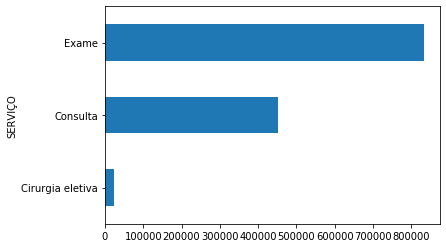

In [8]:
df.groupby('SERVIÇO').size().sort_values().plot(kind='barh')

Fizemos um agrupamento da base, em relação à coluna SERVIÇO, pegamos o tamanho do agrupamento, colocamos em ordem, e plotamos um gráfico do tipo barra horizontal

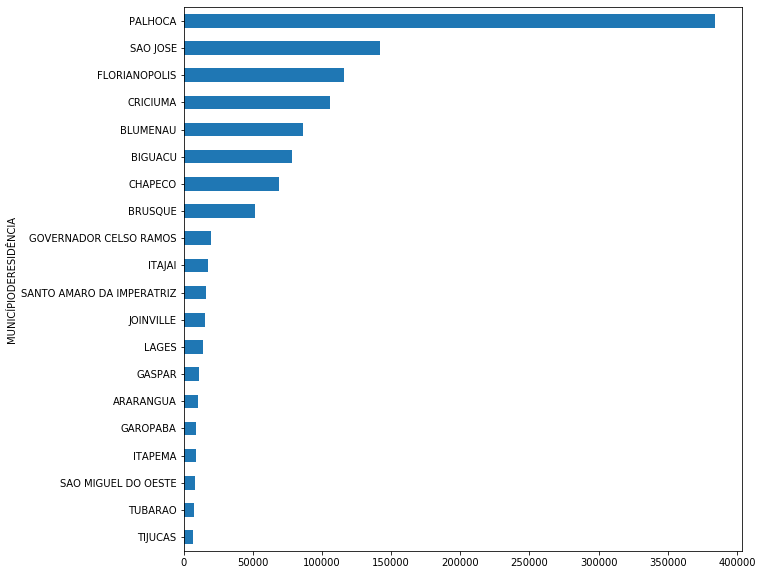

In [9]:
df.groupby('MUNICÍPIODERESIDÊNCIA').size().sort_values().tail(20).plot(kind='barh', figsize=(10,10))

Fizemos algo semelhante em relação aos municípios, como são muitos, pegamos os últimos 20, que são os maiores

**Exercício**

O que você percebe de errado neste gráfico?

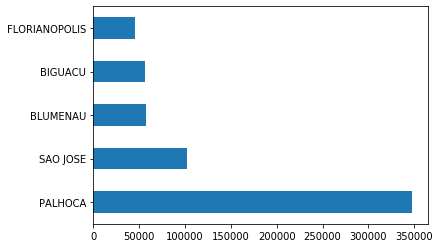

In [10]:
df.query('SERVIÇO == "Exame"')['MUNICÍPIODERESIDÊNCIA'].value_counts().head().plot(kind='barh')

Vamos entrevistar um subconjunto de dados relativos à Exames, quando fizemos groupby, estamos ainda com a base inteira, agrupada segundo um critério. Query cria um recorte, no caso de Exames. Aqui estamos usando value_counts, para o resultado da query, note que antes usamos size, que é mais geral.

In [11]:
df.query('SERVIÇO == "Exame"')['MUNICÍPIODERESIDÊNCIA'].value_counts().head()

PALHOCA          347913
SAO JOSE         102497
BLUMENAU          57577
BIGUACU           55737
FLORIANOPOLIS     45871
Name: MUNICÍPIODERESIDÊNCIA, dtype: int64

Muitas vezes precisamos ver os dados, não apenas em gráficos

Como são as Estatísticas em relação às pessoas que usam o SUS? Quantos exames cada uma realizou naquele mês de novembro, na média, qual o máximo de exames, etc

In [12]:
df.query('SERVIÇO == "Exame" and MUNICÍPIODERESIDÊNCIA == "PALHOCA"').DOCUMENTO.value_counts().describe()

count    31797.000000
mean        10.941693
std         12.505739
min          1.000000
25%          2.000000
50%          4.000000
75%         18.000000
max         90.000000
Name: DOCUMENTO, dtype: float64

**Exercício**

O que você acha de muito diferente em relação aos dados acima

In [13]:
df.query('SERVIÇO == "Exame" and MUNICÍPIODERESIDÊNCIA == "PALHOCA"').DOCUMENTO.value_counts().head()

704207709501384    90
700603418445267    80
700000291920300    80
700505394201153    78
702005327186289    77
Name: DOCUMENTO, dtype: int64

Quais são os exames concretos, associados a esses identificadores

In [14]:
df.query('DOCUMENTO == 704207709501384')[['DESCRIÇÃODOPROCEDIMENTO','DATADASOLICITAÇÃO', 'CENTRALDEREGULAÇÃO/RESPONSÁVEL', 'POSIÇÃO', 'CNESDACENTRALEXECUTANTE', 'CNESDAUNIDADESOLICITANTE']].sort_values(by='DESCRIÇÃODOPROCEDIMENTO').head(10)

,DESCRIÇÃODOPROCEDIMENTO,DATADASOLICITAÇÃO,CENTRALDEREGULAÇÃO/RESPONSÁVEL,POSIÇÃO,CNESDACENTRALEXECUTANTE,CNESDAUNIDADESOLICITANTE
264552,25 HIDROXIVITAMINA D (25 OHD),23/08/2017 11:07:41,CENTRO DE SAUDE VILA NOVA,6519,6082351,7124619
1189115,25 HIDROXIVITAMINA D (25 OHD),23/08/2017 11:07:41,CENTRO DE SAUDE VILA NOVA,4990,6939392,7124619
300253,ACIDO FOLICO,29/09/2017 13:13:39,CENTRO DE SAUDE VILA NOVA,10017,6082351,7124619
1224544,ACIDO FOLICO,29/09/2017 13:13:39,CENTRO DE SAUDE VILA NOVA,8466,6939392,7124619
264515,ACIDO URICO,23/08/2017 11:06:38,CENTRO DE SAUDE VILA NOVA,6515,6082351,7124619
1189078,ACIDO URICO,23/08/2017 11:06:38,CENTRO DE SAUDE VILA NOVA,4986,6939392,7124619
1189079,ANTIBIOGRAMA,23/08/2017 11:06:38,CENTRO DE SAUDE VILA NOVA,4986,6939392,7124619
264516,ANTIBIOGRAMA,23/08/2017 11:06:38,CENTRO DE SAUDE VILA NOVA,6515,6082351,7124619
300254,ANTIPEROXIDASE /ANTI TPO,29/09/2017 13:13:39,CENTRO DE SAUDE VILA NOVA,10017,6082351,7124619
1224545,ANTIPEROXIDASE /ANTI TPO,29/09/2017 13:13:39,CENTRO DE SAUDE VILA NOVA,8466,6939392,7124619


**Exercício**

Verifique os dados acima e elabore uma hipótese para o problema de Santa Catarina

In [15]:
df.query('DOCUMENTO == 700603418445267')[['DESCRIÇÃODOPROCEDIMENTO','DATADASOLICITAÇÃO', 'CENTRALDEREGULAÇÃO/RESPONSÁVEL', 'POSIÇÃO', 'CNESDACENTRALEXECUTANTE', 'CNESDAUNIDADESOLICITANTE']].sort_values(by='DESCRIÇÃODOPROCEDIMENTO').head(10)

,DESCRIÇÃODOPROCEDIMENTO,DATADASOLICITAÇÃO,CENTRALDEREGULAÇÃO/RESPONSÁVEL,POSIÇÃO,CNESDACENTRALEXECUTANTE,CNESDAUNIDADESOLICITANTE
194548,25 HIDROXIVITAMINA D (25 OHD),18/04/2017 17:04:52,CEAP CENTRO ESPECIALIZADO EM ACONSELHAMENTO E ...,339,6082351,5969018
1134084,25 HIDROXIVITAMINA D (25 OHD),18/04/2017 17:04:52,CEAP CENTRO ESPECIALIZADO EM ACONSELHAMENTO E ...,295,6939392,5969018
194549,ACIDO URICO,18/04/2017 17:04:52,CEAP CENTRO ESPECIALIZADO EM ACONSELHAMENTO E ...,339,6082351,5969018
1134085,ACIDO URICO,18/04/2017 17:04:52,CEAP CENTRO ESPECIALIZADO EM ACONSELHAMENTO E ...,295,6939392,5969018
194550,AMILASE,18/04/2017 17:04:52,CEAP CENTRO ESPECIALIZADO EM ACONSELHAMENTO E ...,339,6082351,5969018
1134086,AMILASE,18/04/2017 17:04:52,CEAP CENTRO ESPECIALIZADO EM ACONSELHAMENTO E ...,295,6939392,5969018
1134105,ANTI HBC - IGG ANTICORPOS IGG CONTRA ANTIGENO ...,18/04/2017 17:27:57,CEAP CENTRO ESPECIALIZADO EM ACONSELHAMENTO E ...,296,6939392,5969018
194569,ANTI HBC - IGG ANTICORPOS IGG CONTRA ANTIGENO ...,18/04/2017 17:27:57,CEAP CENTRO ESPECIALIZADO EM ACONSELHAMENTO E ...,340,6082351,5969018
1134106,ANTI HBC - IGM ANTICORPOS IGM CONTRA ANTIGENO ...,18/04/2017 17:27:57,CEAP CENTRO ESPECIALIZADO EM ACONSELHAMENTO E ...,296,6939392,5969018
194570,ANTI HBC - IGM ANTICORPOS IGM CONTRA ANTIGENO ...,18/04/2017 17:27:57,CEAP CENTRO ESPECIALIZADO EM ACONSELHAMENTO E ...,340,6082351,5969018


Observamos que nossa hipótese é comprovada nas maiores contagens, precisamos validar a hipótese analisado o dataset inteiro

In [16]:
def deduplicate_stats(query=None):
    if query:
        df_tmp = df.query(query)
    else:
        df_tmp = df
    total_rows = len(df_tmp)
    unique_rows = len(df_tmp.groupby(['DOCUMENTO', 'DESCRIÇÃODOPROCEDIMENTO']))
    unique_rows_same_date = len(df_tmp.groupby(['DOCUMENTO', 'DESCRIÇÃODOPROCEDIMENTO', 'DATADASOLICITAÇÃO']))
    reducao_fila = (total_rows - unique_rows) / total_rows
    print('           registros na fila:', total_rows)
    print('    registros únicos na fila:', unique_rows)
    print('          duplicados (total):', total_rows - unique_rows)
    print('duplicados (mesmo timestamp):', total_rows - unique_rows_same_date)
    print('    redução com deduplicação:', int(100*reducao_fila), '%')


Ao executar a célula carregamos nossa função. Ela recebe um argumento, caso não tenha sido passado nada, None, você irá usar toda a base, caso contrário, criar um dataframe temporário para a contagem. Queremos saber o número de duplicados gerais e os particulares, com mesma data e hora. Assim veremos se é um erro manual, ou algo sistêmico.

In [17]:
deduplicate_stats('MUNICÍPIODERESIDÊNCIA == "PALHOCA"')

           registros na fila: 384253
    registros únicos na fila: 223579
          duplicados (total): 160674
duplicados (mesmo timestamp): 160305
    redução com deduplicação: 41 %


In [18]:
deduplicate_stats()

           registros na fila: 1306967
    registros únicos na fila: 1080625
          duplicados (total): 226342
duplicados (mesmo timestamp): 222124
    redução com deduplicação: 17 %


**Exercício**

Verifique os municípios de FLORIANOPOLIS e JOINVILLE